### Task #5

### Exploratory Data Analysis - Sports

### Author : Gaurav Khare

● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’ 

● As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team. 

● Suggest teams or players a company should endorse for its products. 

● Dataset: https://bit.ly/34SRn3b

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Reading data 
deliveries = pd.read_csv(r"Indian Premier League\deliveries.csv")
matches = pd.read_csv(r"Indian Premier League\matches.csv")
print("Data imported successfully")

Data imported successfully


In [3]:
# First 5 Rows of the deliveries dataset
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
# Last 5 Rows of the deliveries dataset
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [5]:
# First 5 Rows of the matches dataset
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
# Last 5 Rows of the matches dataset
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [7]:
#Determinig the columns in the dataset
print(deliveries.columns)
print("*"*100)
print(matches.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind', 'fielder'], dtype='object')
****************************************************************************************************
Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3'], dtype='object')


In [8]:
# Determining the shape of the deliveries dataset
print("There are total %d columns in the deliveries datset." %deliveries.shape[1])
print("There are total %d rows in the deliveries dataset." %deliveries.shape[0])

There are total 21 columns in the deliveries datset.
There are total 179078 rows in the deliveries dataset.


In [9]:
# Determining the shape of the matches dataset
print("There are total %d columns in the matches dataset." %matches.shape[1])
print("There are total %d rows in the matches dataset." %matches.shape[0])

There are total 18 columns in the matches dataset.
There are total 756 rows in the matches dataset.


In [10]:
# Basic Information of the deliveries dataset
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [11]:
# Basic Information of the matches dataset
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [12]:
# Determining the Datatype of the dataset
print(deliveries.dtypes)
print("*"*100)
print(matches.dtypes)

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object
****************************************************************************************************
id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by

In [13]:
# Determining the unique values in the dataset
print(deliveries.nunique())
print("*"*100)
print(matches.nunique())

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64
****************************************************************************************************
id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2       

In [14]:
# Determining the missing values in the dataset
print(deliveries.isnull().sum())
print("*"*100)
print(matches.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64
****************************************************************************************************
id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match     

In [15]:
# Determining the missing values in the dataset
print(deliveries.isna().sum())
print("*"*100)
print(matches.isna().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64
****************************************************************************************************
id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match     

In [16]:
#dropping three empty columns
deliveries.drop(['player_dismissed', 'dismissal_kind', 'fielder'],axis=1, inplace=True)

In [17]:
matches.drop("umpire3",axis =1, inplace=True)

In [18]:
#Let's find the venues corresponding to which the values of city are empty
matches[matches.city.isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [19]:
matches.city.fillna('Dubai',inplace=True)

In [20]:
#Let's see this based on result column to find why it is empty
matches[matches.player_of_match.isnull()][['player_of_match','result']]

,player_of_match,result
300,NaN,no result
545,NaN,no result
570,NaN,no result
744,NaN,no result


As there was no result, the player of the match is not available

In [21]:
#umpire1 and umpire2 columns have one missing value each
matches[(matches.umpire1.isnull()) | (matches.umpire2.isnull())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


At two matches the umpires wer not recorded 

In [22]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

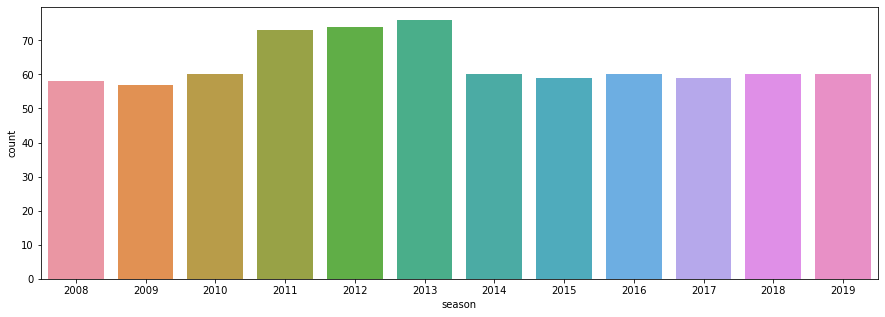

In [23]:
plt.figure(figsize=(15,5))
most_matches = matches['season'].value_counts().reset_index()
most_matches.columns = ['season','count']
sns.barplot(x = 'season',y = 'count', data = most_matches)
plt.show()

Maximum No of Matches were played in the Year 2013

In [24]:
matches['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Dubai               7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [25]:
matches['city'] = matches['city'].replace('Bangalore','Bengaluru')
matches['city'] = matches['city'].replace('Chandigarh','Mohali')

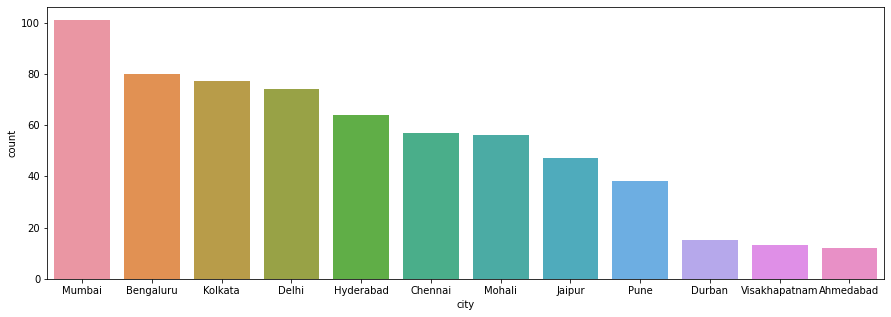

In [26]:
plt.figure(figsize=(15,5))
fav_cities = matches['city'].value_counts().reset_index()
fav_cities.columns = ['city','count']
sns.barplot(x = 'city',y = 'count', data = fav_cities[:12])
plt.show()

In [27]:
matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [28]:
#team1, team2 and winner all 3 columns have rising pune supergiant as well as rising pune supergiants. 
matches['winner'] = matches['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['team1'] = matches['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches['team2'] = matches['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

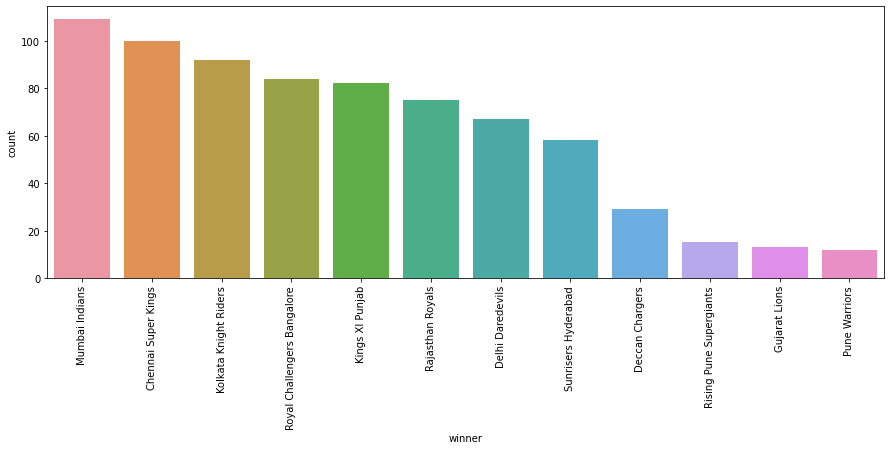

In [29]:
plt.figure(figsize=(15,5))
max_winner = matches['winner'].value_counts().reset_index()
max_winner.columns = ['winner','count']
sns.barplot(x = 'winner',y = 'count', data = max_winner[:12])
plt.xticks(rotation=90)
plt.show()

We can infer that Mumbai Indians have won the most number of matches,while Pune Warriors has won least number of the matches.

In [30]:
matches['win_by']=np.where(matches['win_by_runs']>0,'Bat first','Bowl first')

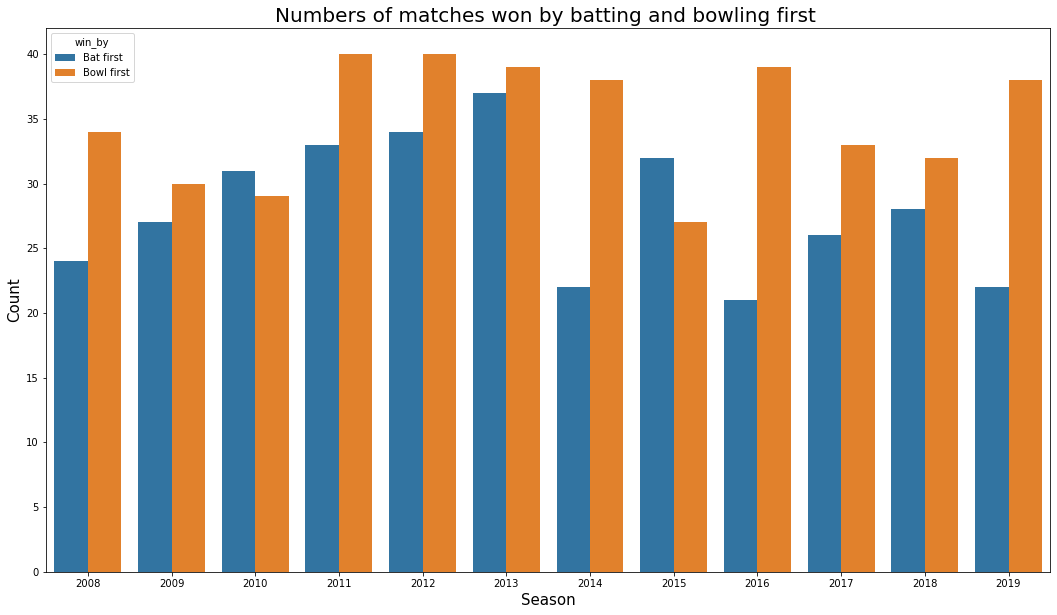

In [31]:
plt.figure(figsize = (18,10))
sns.countplot('season',hue='win_by',data=matches)
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [32]:
matches['venue'].value_counts().sort_values(ascending=False)

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [33]:
matches.venue = matches.venue.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association IS Bindra Stadium, Mohali')

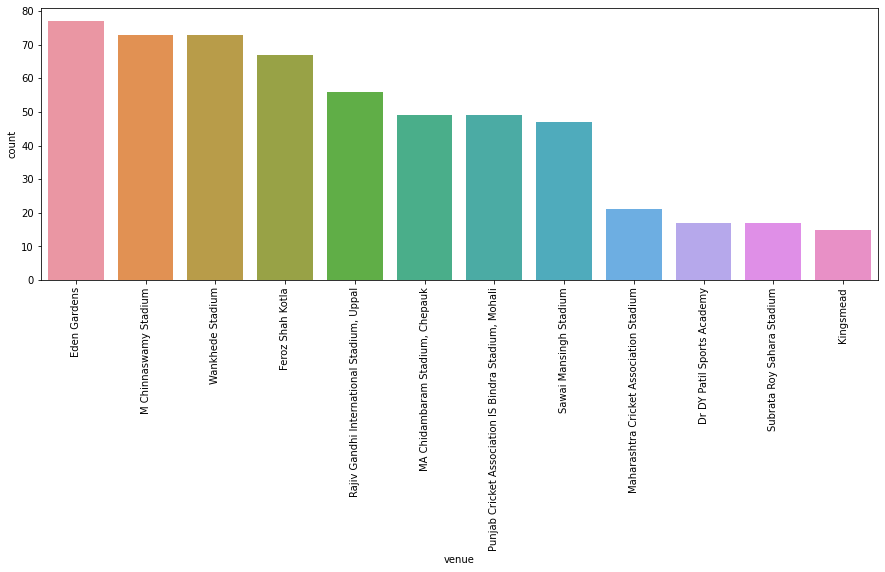

In [34]:
plt.figure(figsize=(15,5))
max_venues = matches['venue'].value_counts().reset_index()
max_venues.columns = ['venue','count']
sns.barplot(x = 'venue',y = 'count', data = max_venues[:12])
plt.xticks(rotation=90)
plt.show()

We can infer that, Eden gardens was the most preferred venue to host matches followed by Wankhede and Chinnaswamy Stadiums

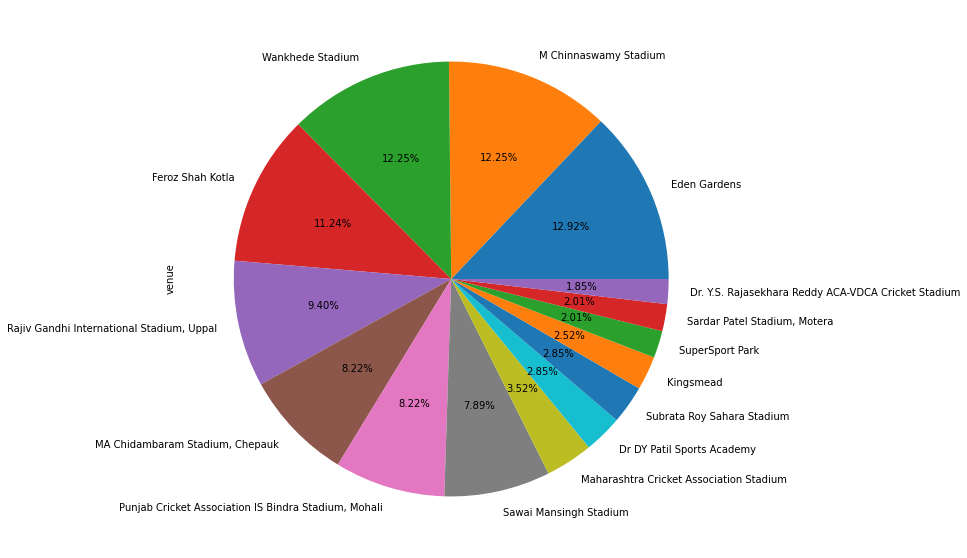

In [35]:
matches['venue'].value_counts()[:15].plot(kind='pie',autopct="%.2f%%",figsize=(10,10))
plt.show()

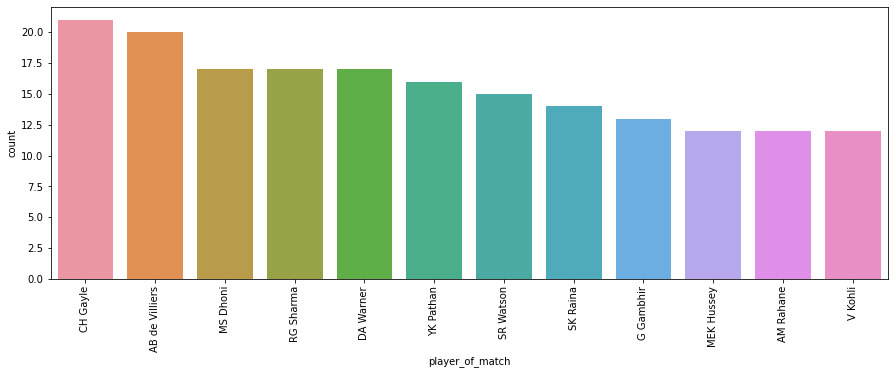

In [36]:
plt.figure(figsize=(15,5))
max_pom = matches['player_of_match'].value_counts().reset_index()
max_pom.columns = ['player_of_match','count']
sns.barplot(x = 'player_of_match',y = 'count', data = max_pom[:12])
plt.xticks(rotation=90)
plt.show()

We can clearly infer that CH GAYLE is the most successful player and has recieved the man of the match awards the maximum number of times.

In [37]:
CH_Gayle = matches[matches['player_of_match']== 'CH Gayle'][['player_of_match','season','venue','city']]
CH_Gayle.groupby('venue')['player_of_match'].value_counts().sort_values(ascending = False)

venue                                                 player_of_match
M Chinnaswamy Stadium                                 CH Gayle           9
Punjab Cricket Association IS Bindra Stadium, Mohali  CH Gayle           3
Eden Gardens                                          CH Gayle           2
Wankhede Stadium                                      CH Gayle           1
Subrata Roy Sahara Stadium                            CH Gayle           1
Sawai Mansingh Stadium                                CH Gayle           1
Saurashtra Cricket Association Stadium                CH Gayle           1
MA Chidambaram Stadium, Chepauk                       CH Gayle           1
Kingsmead                                             CH Gayle           1
Feroz Shah Kotla                                      CH Gayle           1
Name: player_of_match, dtype: int64

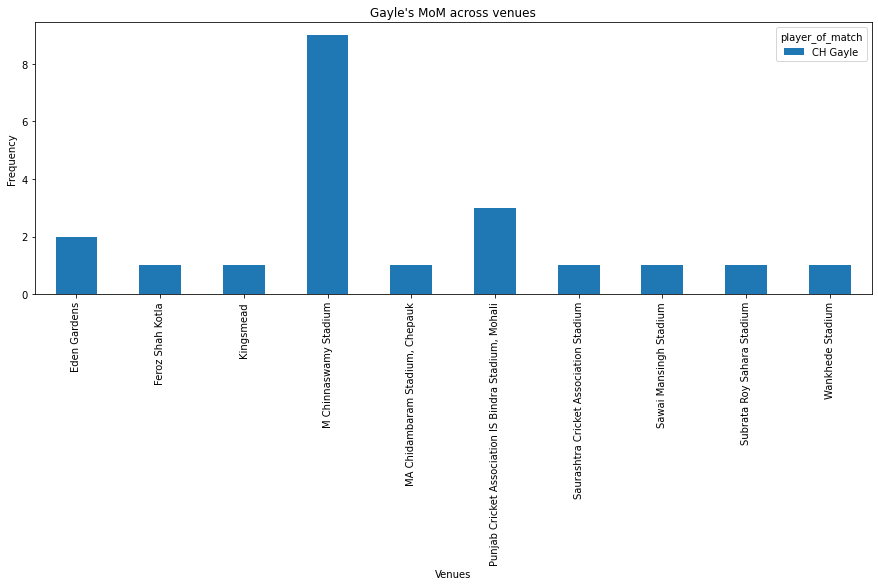

In [38]:
CH_Gayle.groupby('venue')['player_of_match'].value_counts().unstack().plot(kind = 'bar', stacked = False,figsize=(15,5))
plt.title("Gayle's MoM across venues")
plt.ylabel("Frequency")
plt.xlabel("Venues")
plt.show()

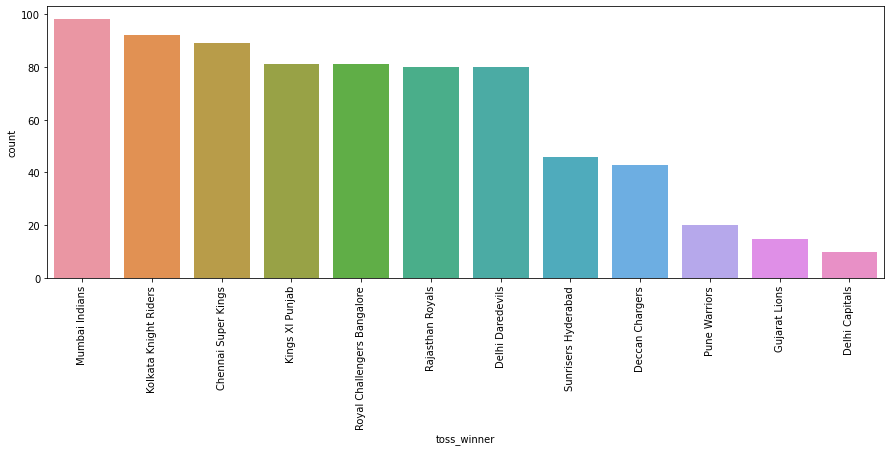

In [39]:
plt.figure(figsize=(15,5))
match_won_by_toss_winner= matches['toss_winner'].value_counts().reset_index()
match_won_by_toss_winner.columns = ['toss_winner','count']
sns.barplot(x = 'toss_winner',y = 'count', data = match_won_by_toss_winner[:12])
plt.xticks(rotation=90)
plt.show()

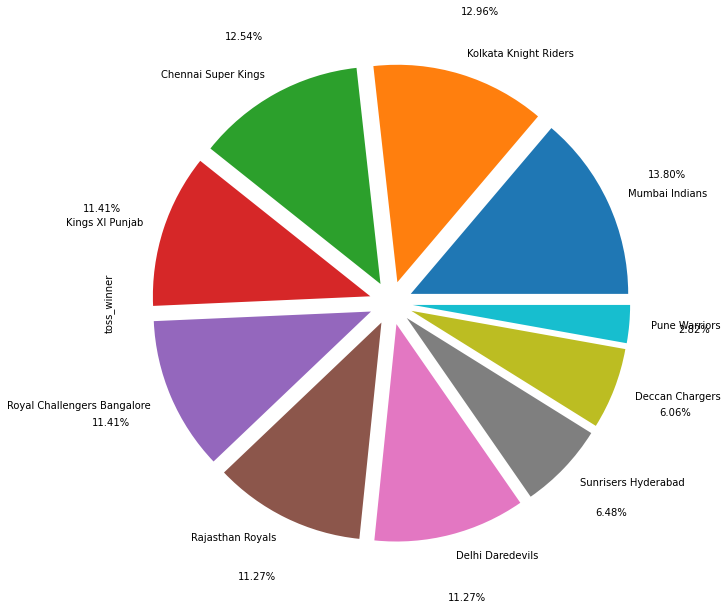

In [40]:
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
matches['toss_winner'].value_counts()[:10].plot(kind='pie',autopct="%.2f%%",figsize=(10,10),pctdistance=1.3,explode=explode)
plt.show()

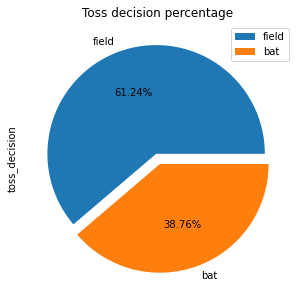

In [41]:
matches['toss_decision'].value_counts()[:15].plot(kind='pie',autopct="%.2f%%",explode=[0.05,0.05],figsize=(8,5),legend=True)
plt.title("Toss decision percentage")
plt.show()

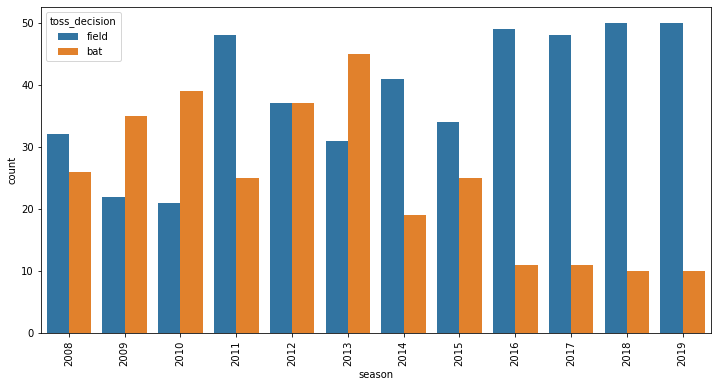

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=matches)
plt.xticks(rotation='vertical')
plt.show()

It can be infered that every year the teams preferred to field first, except 2009, 2010, 2013

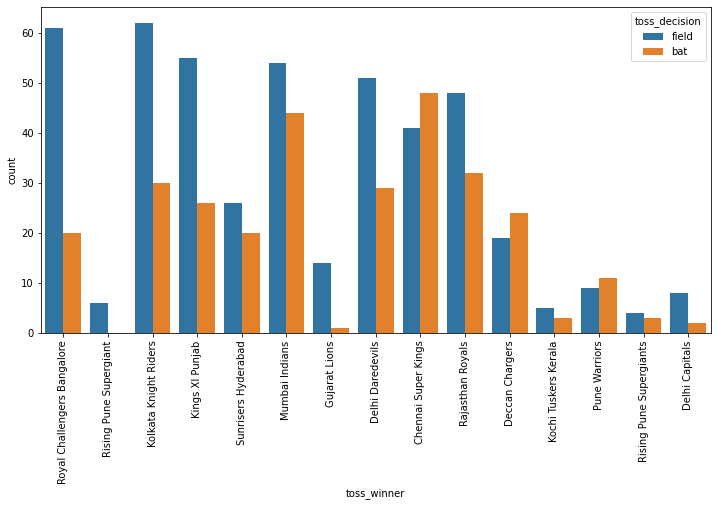

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x='toss_winner',hue='toss_decision',data=matches)
plt.xticks(rotation=90)
plt.show()

It can be infered that all of the teams except CHENNAI SUPER KINGS and PUNE WARRIORS chose to field rather than to bat.

In [44]:
matches['toss_win_game_win'] = np.where((matches.toss_winner == matches.winner),'Yes','No')

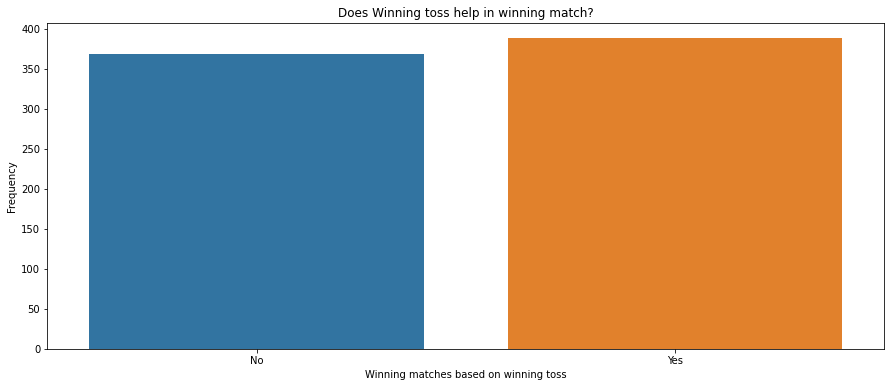

In [45]:
plt.figure(figsize=(15,6))
sns.countplot('toss_win_game_win', data=matches)
plt.title("Does Winning toss help in winning match?")
plt.ylabel("Frequency")
plt.xlabel("Winning matches based on winning toss")
plt.show()

Teams winning tosses have won slightly more number of matches

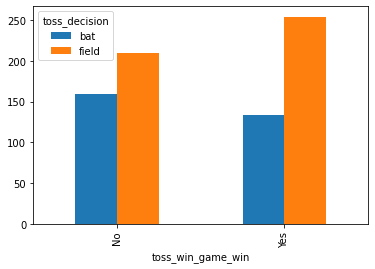

In [46]:
pd.crosstab(matches.toss_win_game_win, matches.toss_decision).plot(kind='bar')
plt.show()

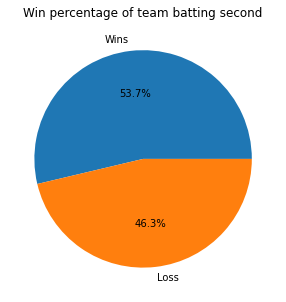

In [47]:
plt.figure(figsize=(15,5))
num_of_wins = (matches.win_by_wickets>0).sum()
num_of_loss = (matches.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Win percentage of team batting second")
plt.show()

In [48]:
bat_first=matches[matches['win_by_runs']!=0]
bat_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,win_by,toss_win_game_win
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Bat first,No
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,Bat first,Yes
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,Bat first,No
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,Bat first,No
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,Bat first,Yes


In [49]:
bat_first.shape

(337, 19)

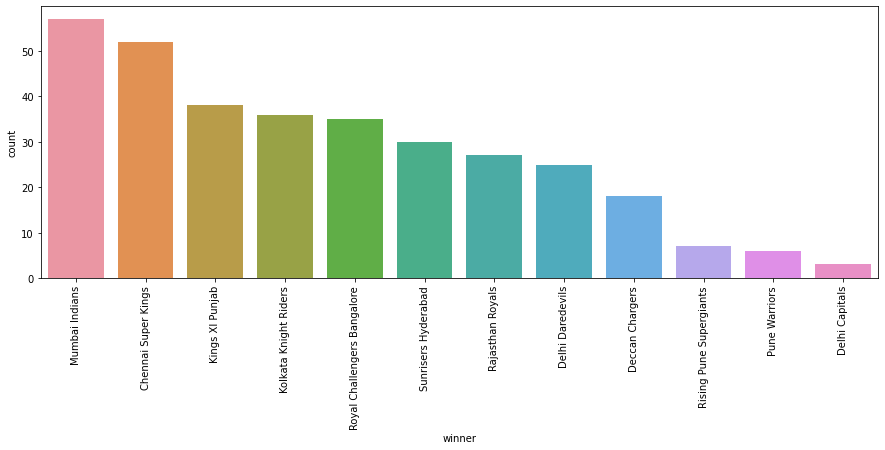

In [50]:
plt.figure(figsize=(15,5))
bat_first_max_winner = bat_first['winner'].value_counts().reset_index()
bat_first_max_winner.columns = ['winner','count']
sns.barplot(x = 'winner',y = 'count', data = bat_first_max_winner[:12])
plt.xticks(rotation=90)
plt.show()

It can be infered that MUMBAI INDIANS won the maximum number of matches followed with CHENNAI SUPER KINGS 

In [51]:
bat_sec=matches[matches['win_by_wickets']!=0]
bat_sec.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,win_by,toss_win_game_win
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Bowl first,No
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Bowl first,Yes
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Bowl first,Yes
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,Bowl first,Yes
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,Bowl first,Yes


In [52]:
bat_sec.shape

(406, 19)

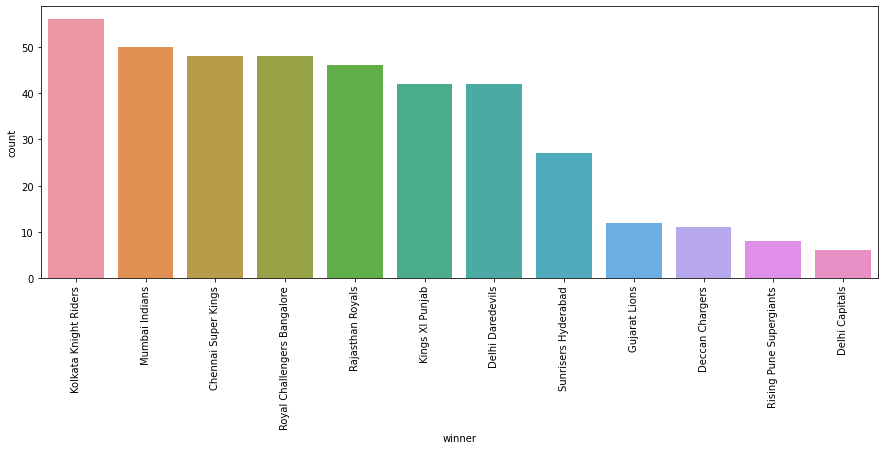

In [53]:
plt.figure(figsize=(15,5))
bat_sec_max_winner = bat_sec['winner'].value_counts().reset_index()
bat_sec_max_winner.columns = ['winner','count']
sns.barplot(x = 'winner',y = 'count', data = bat_sec_max_winner[:12])
plt.xticks(rotation=90)
plt.show()

It can be infered that KOLKATA KNIGHT RIDERS won the maximum number of matches when batted second

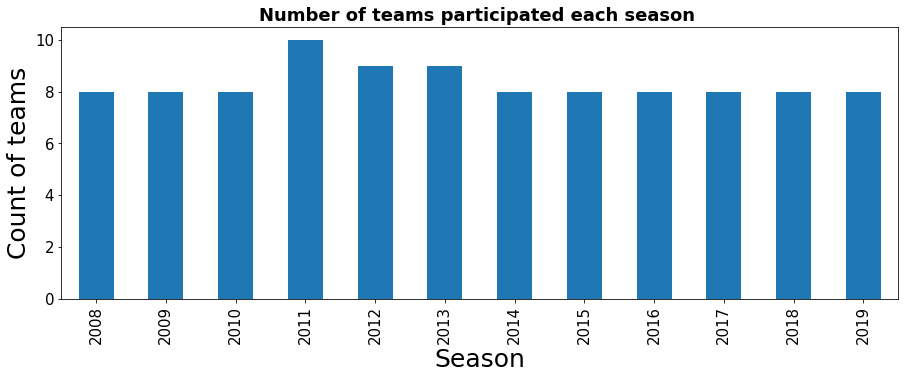

In [54]:
matches.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel("Count of teams", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

10 teams played in 2011 and 9 teams each in 2012 and 2013

This explains why 2011-2013 have seen more matches being played than other seasons

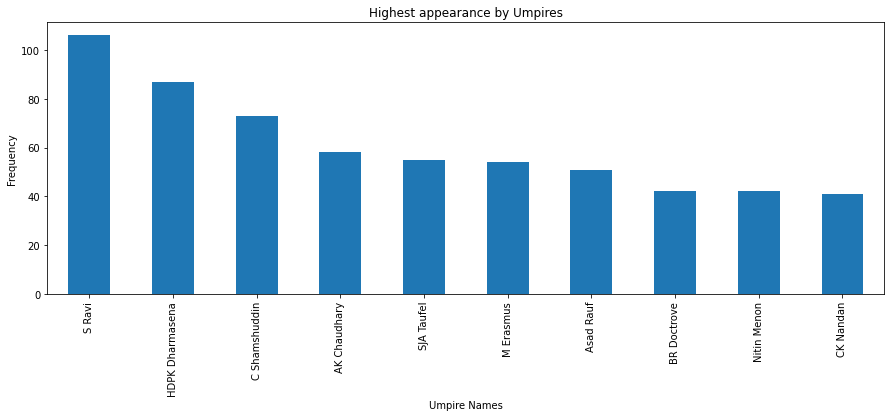

In [55]:
#Umpires who have appeared in most number of matches
umpire_total = pd.concat([matches.umpire1,matches.umpire2], ignore_index=True)
umpire_total = pd.DataFrame(umpire_total, columns = ['umpire_name'])

umpire_total['umpire_name'].value_counts().head(10).plot(kind = 'bar', figsize = (15,5))
plt.title("Highest appearance by Umpires")
plt.ylabel("Frequency")
plt.xlabel("Umpire Names")
plt.show()

In [56]:
print(deliveries.batting_team.unique())
print(deliveries.bowling_team.unique())

['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Delhi Capitals']
['Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Rising Pune Supergiant' 'Mumbai Indians' 'Kolkata Knight Riders'
 'Gujarat Lions' 'Kings XI Punjab' 'Delhi Daredevils'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [57]:
#Rising Pune Supergiants had duplicate entries,Making it Rising Pune Supergiants
deliveries['batting_team'] = deliveries['batting_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [58]:
merged= pd.merge(deliveries,matches,left_on='match_id', right_on ='id')
merged.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,win_by,toss_win_game_win
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Bat first,No
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Bat first,No
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Bat first,No
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Bat first,No
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Bat first,No


### Top 10 batsmen with the highest runs

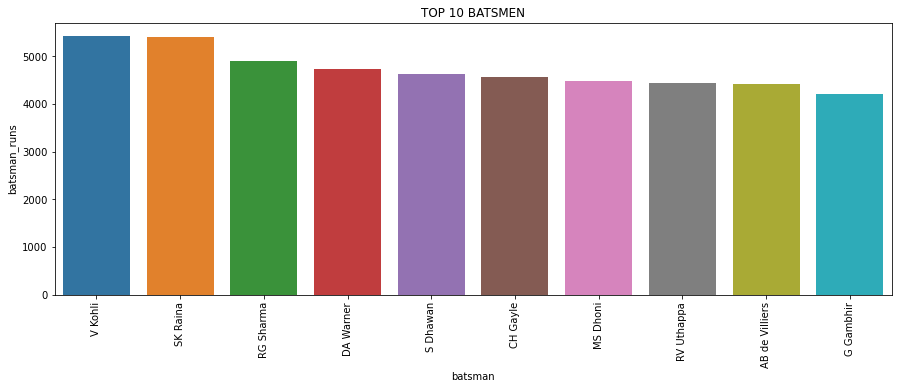

In [59]:
plt.figure(figsize=(15,5))
bats=merged.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[:10].reset_index()
sns.barplot(x = 'batsman',y = 'batsman_runs', data = bats)
plt.xticks(rotation=90)
plt.title("TOP 10 BATSMEN")
plt.show()


### Highest Sixes Scored by Batsman

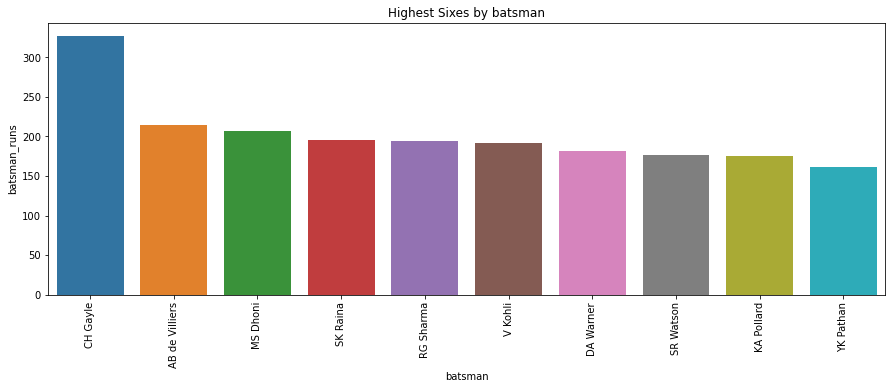

In [60]:
plt.figure(figsize=(15,5))
six=merged[merged['batsman_runs']==6]
highest_sixes=six.groupby('batsman').count()['batsman_runs'].sort_values(ascending=False)[:10].reset_index()
sns.barplot(x = 'batsman',y = 'batsman_runs', data = highest_sixes)
plt.xticks(rotation=90)
plt.title("Highest Sixes by batsman")
plt.show()

### Highest no of Fours 

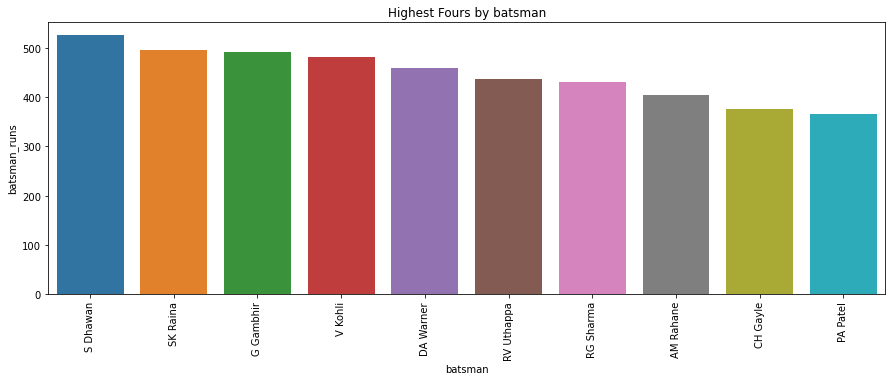

In [61]:
plt.figure(figsize=(15,5))
six=merged[merged['batsman_runs']==4]
highest_sixes=six.groupby('batsman').count()['batsman_runs'].sort_values(ascending=False)[:10].reset_index()
sns.barplot(x = 'batsman',y = 'batsman_runs', data = highest_sixes)
plt.xticks(rotation=90)
plt.title("Highest Fours by batsman")
plt.show()

### Runs Scored in Every Season

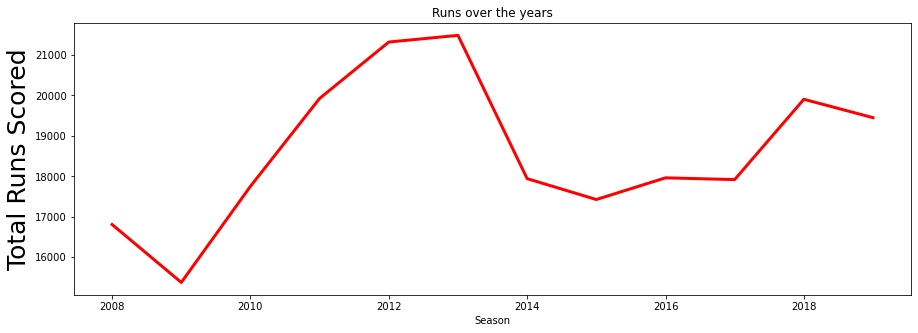

In [62]:
merged.groupby('season')['batsman_runs'].sum().plot(kind = 'line', linewidth = 3, figsize =(15,5),
                                                                                             color = 'red')
plt.title("Runs over the years")
plt.xlabel("Season")
plt.ylabel("Total Runs Scored", size = 25)
plt.show()

Conclusion :

The highest number of match played in IPL season was 2013,2014,2015.

The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.

Teams which Bowl first has higher chances of winning then the team which bat first.

After winning toss more teams decide to do fielding first.

Top player of match winning are CH gayle, AB de villers.

The highest number of four hit by player is Shikar Dhawan.

The highest number of six hit by player is CH gayle.

Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma.

The highest number of matches played by player name are SK Raina, RG Sharma.

The IPL most wicket taken blower is SL Malinga.